In [22]:
#Importing packages
#Model
from sklearn.tree import DecisionTreeClassifier
#Sklearn
from sklearn import model_selection, linear_model
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,RepeatedStratifiedKFold,cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc,roc_auc_score,roc_curve,classification_report

In [23]:
#Others
import random
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np
import math
import os
import warnings
import optuna
import joblib

In [24]:
#Setting the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:/Users/A/Desktop/Paper_0_Hydrogel")

In [25]:
def Model_results(Model_clf,X_test,y,Cv_model):
    Model_scores= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=True)
    Model_score= cross_validate(estimator=Model_clf, X=X_test, y=y, cv=Cv_model,scoring=( 'accuracy','f1','precision','recall','roc_auc'), return_train_score=False)
#Accuracy
    Model_Accuracy_test_mean=Model_scores['test_accuracy'].mean()
    Model_Accuracy_test_se=(Model_scores['test_accuracy'].std()/math.sqrt(len(Model_scores['test_accuracy']))) 
    Model_Accuracy_train_mean=Model_scores['train_accuracy'].mean()
    Model_Accuracy_train_se=(Model_scores['train_accuracy'].std()/math.sqrt(len(Model_scores['train_accuracy']))) 
#f1
    Model_f1_mean=Model_score['test_f1'].mean()
    Model_f1_se=(Model_score['test_f1'].std()/math.sqrt(len(Model_score['test_f1']))) 
#precision
    Model_precision_mean=Model_score['test_precision'].mean()
    Model_precision_se=(Model_score['test_precision'].std()/math.sqrt(len(Model_score['test_precision']))) 
#recall
    Model_recall_mean=Model_score['test_recall'].mean()
    Model_recall_se=(Model_score['test_recall'].std()/math.sqrt(len(Model_score['test_recall']))) 
#roc_auc
    Model_roc_auc_mean=Model_score['test_roc_auc'].mean()
    Model_roc_auc_se=(Model_score['test_roc_auc'].std()/math.sqrt(len(Model_score['test_roc_auc']))) 
    Model = {'Mean':[Model_Accuracy_test_mean,Model_Accuracy_train_mean,Model_f1_mean,Model_precision_mean,Model_recall_mean,Model_roc_auc_mean],
        'Se':[Model_Accuracy_test_se,Model_Accuracy_train_se,Model_f1_se,Model_precision_se,Model_recall_se,Model_roc_auc_se]}
    Model = pd.DataFrame(Model, index=['Accuracy_test','Accuracy_train','F1 Score','Precision','Recall','Roc_auc']) # 这里设定了 index 个数要和列表长度一致
    return Model

In [26]:
Cv_optuna= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_model= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0)
Cv_RFECV= RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)

In [27]:
#Reading the data
ML_data= pd.read_csv("./Original data/ML_data.csv",header=0,index_col=0)
X_NAomit_data= pd.read_csv("./Original data/X_NAomit_data.csv",header=0,index_col=0)
Raw_data = pd.read_csv('./Original data/raw_data.csv',index_col=0)
Raw_data['Gelability']=np.where(Raw_data['Gelability']=='Gelable', 1, 0)
#original data(descriptors= 4175）
print(X_NAomit_data.shape)
X_NAomit_data.head()

(71, 4175)


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [28]:
#Data after feature selection (descriptors= 64）
print(ML_data.shape)
ML_data.head()

(71, 40)


,MATS3p,SM10_AEA(dm),GATS7s,F07[N-O],VE1sign_Dz(v),VE3sign_D/Dt,P_VSA_charge_4,CATS2D_09_DA,B09[O-O],CATS2D_06_DL,...,MATS2m,MATS2p,GATS6i,P_VSA_charge_2,Eig03_AEA(ed),CATS2D_05_DA,GATS2p,C-016,s2_pathLength,GATS8i
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.223067,0.382490,0.390779,0.500000,0.339202,0.433674,0.000000,0.4,0.0,0.00,...,0.136148,0.791478,0.070041,0.015761,0.580423,0.500000,0.304895,0.0,0.090909,0.586479
Ma_2019_U,0.218409,0.270850,0.589845,0.000000,0.097243,0.770077,0.000000,0.2,1.0,0.25,...,0.028067,0.316380,0.138782,0.384100,0.200950,0.500000,0.711020,1.0,0.090909,0.000000
Ma_2019_C,0.189242,0.270850,0.462449,0.166667,0.081578,0.770077,0.359389,0.2,0.0,0.25,...,0.157809,0.441757,0.327739,0.025930,0.200950,0.500000,0.667729,1.0,0.090909,0.485155
Ma_2019_G,0.307924,0.390516,0.365302,0.500000,0.259153,0.508232,0.359389,0.6,1.0,0.00,...,0.224020,0.631157,0.262950,0.373931,0.587700,0.666667,0.484050,0.0,0.090909,0.607829
Ma_2019_dA,0.277926,0.290988,0.582334,0.166667,0.404032,0.457316,0.000000,0.4,0.0,0.25,...,0.230461,0.794139,0.231586,0.015761,0.536421,0.000000,0.242784,0.0,0.151515,0.658417


In [29]:
#Data pre-processing of models
X_test_NAomit=np.array(X_NAomit_data)
X_test_ML=np.array(ML_data)
y=Raw_data['Gelability'].values
clf=DecisionTreeClassifier(random_state=0)

In [30]:
#Model1 （4175 descriptors）
Model1_clf=clf
#Model1
Model1=Model_results(Model1_clf,X_test_NAomit,y,Cv_model)
Model1

,Mean,Se
Accuracy_test,0.653524,0.014907
Accuracy_train,0.978164,0.001539
F1 Score,0.683326,0.014643
Precision,0.672220,0.014249
Recall,0.712143,0.020957
Roc_auc,0.654124,0.015640


In [31]:
#Model2 （40 descriptors）
Model2_clf=clf
Model2_clf.fit(X_test_ML, y)
#Model2
Model2=Model_results(Model2_clf,X_test_ML,y,Cv_model)
Model2

,Mean,Se
Accuracy_test,0.637143,0.014496
Accuracy_train,0.978164,0.001539
F1 Score,0.662315,0.015259
Precision,0.666945,0.017766
Recall,0.682857,0.022625
Roc_auc,0.636807,0.014152


In [32]:
#Tuning hyperparameters
#Step 1. Define an objective function to be maximized.
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth',3,5,1),
        'max_features' : trial.suggest_int("max_features",10,20,1),
        'min_samples_split':trial.suggest_int('min_samples_split',2,25,1)
    }
    model = DecisionTreeClassifier(**param,random_state=1)

 
# Step 2: Scoring method:
    score = model_selection.cross_val_score(model, X_test_ML, y, n_jobs=8, scoring="accuracy",cv=Cv_optuna)
    accuracy = score.mean()
    return accuracy
 
# Step 3: Running it
study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=0))
study.optimize(objective, n_trials=100, show_progress_bar=False)


[I 2023-01-14 07:27:16,110] A new study created in memory with name: no-name-d11fbd16-89da-43aa-b865-07fad8b9d9d3
[I 2023-01-14 07:27:18,255] Trial 0 finished with value: 0.6324761904761904 and parameters: {'max_depth': 4, 'max_features': 17, 'min_samples_split': 16}. Best is trial 0 with value: 0.6324761904761904.
[I 2023-01-14 07:27:18,295] Trial 1 finished with value: 0.6182857142857143 and parameters: {'max_depth': 4, 'max_features': 14, 'min_samples_split': 17}. Best is trial 0 with value: 0.6324761904761904.
[I 2023-01-14 07:27:18,334] Trial 2 finished with value: 0.6155238095238095 and parameters: {'max_depth': 4, 'max_features': 19, 'min_samples_split': 25}. Best is trial 0 with value: 0.6324761904761904.
[I 2023-01-14 07:27:18,372] Trial 3 finished with value: 0.6124761904761905 and parameters: {'max_depth': 4, 'max_features': 18, 'min_samples_split': 14}. Best is trial 0 with value: 0.6324761904761904.
[I 2023-01-14 07:27:18,411] Trial 4 finished with value: 0.632380952380952

In [33]:
# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")
# Setting the best model
clf =DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)

The best parameters are : 
{'max_depth': 3, 'max_features': 14, 'min_samples_split': 2}


In [34]:
#Model3
Model3=Model_results(clf,X_test_ML,y,Cv_model)
Model3

,Mean,Se
Accuracy_test,0.658381,0.015817
Accuracy_train,0.883709,0.005547
F1 Score,0.679582,0.016978
Precision,0.680246,0.015629
Recall,0.701429,0.025168
Roc_auc,0.688040,0.018935


In [35]:
#Recursive feature elimination
min_features_to_select =5
rfecv = RFECV(estimator=clf,step=1,cv=Cv_RFECV,scoring="accuracy",min_features_to_select=min_features_to_select,n_jobs=8)
rfecv.fit(X_test_ML,y)
columns=Series(ML_data.columns.tolist())[rfecv.support_.tolist()].tolist()

In [45]:
data_dt=ML_data[columns]
data_dt.to_csv("./Results/data_dt.csv",sep=',')
X_DT=np.array(data_dt)

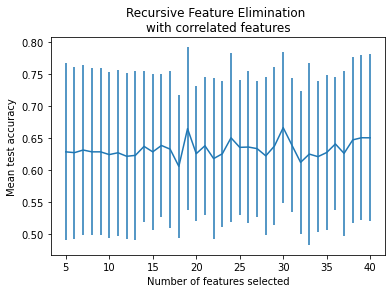

In [37]:
import matplotlib.pyplot as plt
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [38]:
#Model4 （len(columns) descriptors）
Model4_clf=DecisionTreeClassifier(max_depth = study.best_params['max_depth']
              ,max_features = study.best_params['max_features']
              #,n_estimators = study.best_params['n_estimators']
              #,learning_rate = study.best_params['learning_rate']
              ,min_samples_split= study.best_params['min_samples_split']
              ,random_state=1)
Model4_clf.fit(X_DT, y)
#Model4
Model4=Model_results(Model4_clf,X_DT,y,Cv_model)
Model4


,Mean,Se
Accuracy_test,0.591619,0.015568
Accuracy_train,0.816585,0.007380
F1 Score,0.625156,0.019512
Precision,0.604398,0.012476
Recall,0.687857,0.032901
Roc_auc,0.632662,0.016750


In [39]:
Model4_clf=Model4_clf.fit(X_DT, y)
#Saving the final model
joblib.dump(Model4_clf, './Models/DT.pkl')
DT= joblib.load(filename='./Models/DT.pkl')

In [40]:
# Prediction of gelability
X_test_dataframe=pd.read_csv("./Original data/X_test_data.csv",sep=',',index_col=0)
X_test_last=X_test_dataframe[data_dt.columns.to_list()]
X_test=np.array(X_test_last)
X_test_last.head()

,B09[O-O],CATS2D_06_DL,SpMAD_EA(ri),SM5_X,P_VSA_charge_7,CATS2D_04_AA,CATS2D_05_DL,H-052,CATS2D_09_AA,F05[N-N],...,MATS2m,MATS2p,GATS6i,P_VSA_charge_2,Eig03_AEA(ed),CATS2D_05_DA,GATS2p,C-016,s2_pathLength,GATS8i
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.0,0.25,0.473899,0.693949,0.055154,0.000000,0.333333,1.0,0.000000,0.0,...,0.369317,0.839555,-0.520914,0.139311,0.002663,-0.166667,0.120946,0.0,0.272727,-0.234805
13463,0.0,0.00,0.351799,0.313031,0.000000,0.285714,0.333333,0.0,0.000000,0.0,...,-0.145355,0.534014,0.173585,0.015761,0.580423,0.166667,0.224814,0.0,0.090909,0.557069
39148,0.0,0.00,0.607535,0.313031,0.365425,0.428571,0.000000,0.0,0.142857,0.0,...,0.490001,1.437855,-0.901637,0.015761,0.676324,0.500000,-0.226505,0.0,0.272727,0.231925
56328,0.0,0.00,0.439683,0.397097,0.000000,0.142857,0.000000,0.0,0.142857,0.0,...,0.185979,0.786846,0.422220,0.015761,0.316590,0.000000,0.189035,0.0,0.030303,0.464901
67358,0.0,0.00,0.630331,0.226688,0.000000,0.714286,0.000000,0.0,0.142857,0.0,...,0.151812,0.729538,0.090504,0.000000,0.632697,0.500000,0.423568,0.0,0.090909,0.469174


In [41]:
Predicted_data=pd.DataFrame(DT.predict_proba(X_test),columns=['Probability of not gelable','Probability of gelable'])

Predicted_data

,Probability of not gelable,Probability of gelable
0,1.000000,0.000000
1,0.395349,0.604651
2,0.395349,0.604651
3,0.395349,0.604651
4,0.395349,0.604651
...,...,...
7252,1.000000,0.000000
7253,0.395349,0.604651
7254,0.000000,1.000000
7255,0.395349,0.604651


In [42]:
#Predicted results
Predicted_data=pd.DataFrame(DT.predict_proba(X_test),columns=['Probability of not gelable','Probability of gelable'])
Predicted_data.index=X_test_last.index
Predicted_data.sort_values(by="Probability of gelable" , inplace=True, ascending=False)
Predicted_data.to_csv("./Results/DT_predict_data.csv",sep=',')
Predicted_data.head()

,Probability of not gelable,Probability of gelable
cid,,
3010606,0.0,1.0
15868081,0.0,1.0
12097726,0.0,1.0
12097725,0.0,1.0
11777114,0.0,1.0


In [43]:
#Saving the data of model performance
Model_data=pd.concat([Model1,Model2,Model3,Model4],axis=1)
Model_data.to_csv("./Results/DT_model_data.csv",sep=',')
Model_data.columns = [['DecisionTree']*8,['Model 1','Model 1', 'Model 2','Model 2', 'Model 3', 'Model 3', 'Model 4', 'Model 4'], ['Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se', 'Mean', 'Se']]  
Model_data.columns.names=['Method','Model','Values']
Model_data.to_csv('./Results/DT_model_data.csv',encoding='utf-8')
#Read data：pd.read_csv('./Results/DT_model_data.csv',encoding='utf-8',header=[0,1,2])
Model_data

Method         DecisionTree                                                    \
Model               Model 1             Model 2             Model 3             
Values                 Mean        Se      Mean        Se      Mean        Se   
Accuracy_test      0.653524  0.014907  0.637143  0.014496  0.658381  0.015817   
Accuracy_train     0.978164  0.001539  0.978164  0.001539  0.883709  0.005547   
F1 Score           0.683326  0.014643  0.662315  0.015259  0.679582  0.016978   
Precision          0.672220  0.014249  0.666945  0.017766  0.680246  0.015629   
Recall             0.712143  0.020957  0.682857  0.022625  0.701429  0.025168   
Roc_auc            0.654124  0.015640  0.636807  0.014152  0.688040  0.018935   

Method                              
Model            Model 4            
Values              Mean        Se  
Accuracy_test   0.591619  0.015568  
Accuracy_train  0.816585  0.007380  
F1 Score        0.625156  0.019512  
Precision       0.604398  0.012476  
Recall          0.687857  0.032901  
Roc_auc         0.632662  0.016750

In [44]:
#Feature Importance
DT= joblib.load(filename='./Models/DT.pkl')
result = permutation_importance(
    DT, X_DT, y, n_repeats=1000, random_state=0, n_jobs=2)
clf2_importances = pd.Series(result.importances_mean, index= columns)
importances_mean=pd.DataFrame(clf2_importances, index=columns)
importances_std=pd.DataFrame(result.importances_std, index=columns)
importances_se=pd.DataFrame(result.importances_std/math.sqrt(10), index=columns)
importances_=pd.concat([importances_mean,importances_std,importances_se],axis=1)
importances_.columns=["mean","std","se"]
Feature_importance=importances_.sort_values(by="mean",ascending=True)
Feature_importance.columns=[['DecisionTree']*3,["mean","std","se"]]
Feature_importance.columns.names=['Method','Values']
Feature_importance.to_csv('./Results/DT_feature_importance.csv',encoding='utf-8')
Feature_importance

Method         DecisionTree                    
Values                 mean       std        se
B09[O-O]           0.000000  0.000000  0.000000
C-016              0.000000  0.000000  0.000000
GATS2p             0.000000  0.000000  0.000000
CATS2D_05_DA       0.000000  0.000000  0.000000
Eig03_AEA(ed)      0.000000  0.000000  0.000000
P_VSA_charge_2     0.000000  0.000000  0.000000
GATS6i             0.000000  0.000000  0.000000
MATS2p             0.000000  0.000000  0.000000
MATS2m             0.000000  0.000000  0.000000
IC1                0.000000  0.000000  0.000000
Mv                 0.000000  0.000000  0.000000
P_VSA_LogP_4       0.000000  0.000000  0.000000
s2_numRotBonds     0.000000  0.000000  0.000000
CATS2D_03_DL       0.000000  0.000000  0.000000
nN(CO)2            0.000000  0.000000  0.000000
Eig04_AEA(bo)      0.000000  0.000000  0.000000
P_VSA_LogP_5       0.000000  0.000000  0.000000
MATS3m             0.000000  0.000000  0.000000
SpDiam_AEA(ed)     0.000000  0.000000  0.000000
F05[N-N]           0.000000  0.000000  0.000000
CATS2D_09_AA       0.000000  0.000000  0.000000
CATS2D_05_DL       0.000000  0.000000  0.000000
CATS2D_04_AA       0.000000  0.000000  0.000000
SM5_X              0.000000  0.000000  0.000000
SpMAD_EA(ri)       0.000000  0.000000  0.000000
CATS2D_06_DL       0.000000  0.000000  0.000000
s2_pathLength      0.000000  0.000000  0.000000
GATS8i             0.000000  0.000000  0.000000
P_VSA_charge_7     0.079014  0.031888  0.010084
H-052              0.157592  0.041656  0.013173